In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
%matplotlib inline
import ipywidgets as widgets

In [61]:
def stock_simulator(starting_price,periods,mean,std):
    X_axis = []
    Y_axis = []
    
    current_period = 1
    previous_price = starting_price
    
    while current_period <= periods:
        
        drift = float(mean)/periods
        shock = np.random.normal(loc=drift,scale=float(std)/np.sqrt(periods))
        
        current_price = previous_price + previous_price*(drift + shock)
        previous_price = current_price
        
        X_axis.append(current_period)
        Y_axis.append(current_price)
        
        current_period += 1
    
    plt.subplot(121)
    plt.plot(X_axis,Y_axis)
    return Y_axis[-1]

In [62]:
Var=[]
opt={"AAPL":'Apple' ,"MSFT": 'Microsoft', "GOOGL":'Google' , }
weights = []

In [63]:
def simulator(stock, weight, investment):
    if weight in weights:
        print ("You already chose" + str(100 * weight) + "%")
        return
    
    data = quandl.get("WIKI/"+stock, authtoken="8yt3dxHCW9hqcZbUW4CJ")
    
 
    starting_price = data["Open"][-1]
    periods = 365
    mean = data["Open"].pct_change().dropna().mean()
    std = data["Open"].pct_change().dropna().std()
    
    simulations = 0
    outcomes = []
    while simulations < 1000:
        outcomes.append(stock_simulator(starting_price,periods,mean,std))
        simulations += 1

    plt.ylabel('Return')
    plt.xlabel('Days')
    plt.subplot(122)
    sns.distplot(outcomes,bins=100,color="blue",vertical=True)
    
    q = np.percentile(outcomes,1)
    plt.axhline(q, color="red", linestyle="-")
    
    VaR_coef = (starting_price - q)/starting_price
    VaR = VaR_coef * investment * weight
    print("Your maximum loss will be" +" "+ str(VaR)+ ".")
    Var.append(VaR) 
    weights.append(weight)

In [64]:
stock_inputs_1 = widgets.Dropdown(
    options={'Apple': "AAPL",'Microsoft': "MSFT", 'Google': "GOOGL"},
    value="GOOGL",
    description='Stock 1:',
)

stock_inputs_2 = widgets.Dropdown(
    options={'Apple': "AAPL",'Microsoft': "MSFT", 'Google': "GOOGL"},
    value="GOOGL",
    description='Stock 2:',
)

stock_inputs_3 = widgets.Dropdown(
    options={'Apple': "AAPL", 'Microsoft': "MSFT",'Google': "GOOGL"},
    value="GOOGL",
    description='Stock 3:',
)

weight_input = widgets.Dropdown(
    options = {'30%' : 0.3, '20%': 0.2, '50%':0.5},
    value=0.2,
    description='Weight:',
)


investment_input = widgets.IntSlider(
    value=30000,
    min=1500, max=20000, step=1000,
    description='Budget:',
)

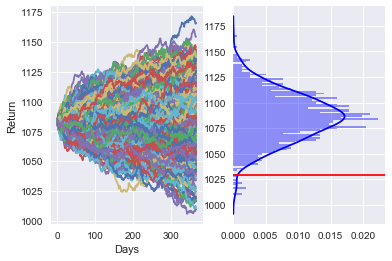

In [65]:
interactive_plot = widgets.interact_manual(simulator,stock=stock_inputs_1,weight=weight_input,investment=investment_input)

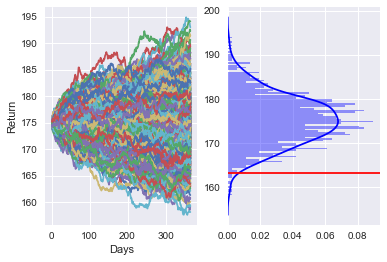

In [66]:
interactive_plot = widgets.interact_manual(simulator,stock=stock_inputs_2,weight=weight_input,investment=investment_input)

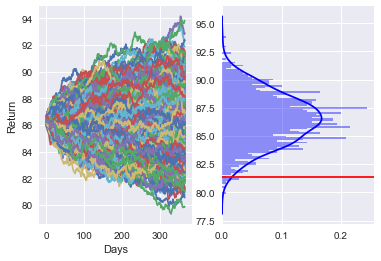

In [70]:
interactive_plot = widgets.interact_manual(simulator,stock=stock_inputs_3,weight=weight_input,investment=investment_input)

In [79]:
result=Var[0] + Var[1] + Var[2]
print ("Your maximum loss from this portfolio investment will be " + str(result) + ".")

Your maximum loss from this portfolio investment will be 864.921058038.
